# MENTAL HEALTH IN TECH WORKSPACE

### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

print('Libraries imported successfully!')

Libraries imported successfully!


### LOAD DATASET

In [2]:
df = pd.read_csv('mental_health_survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### INITIAL EXPLORATION

In [3]:
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 1259, Columns: 27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [6]:
print(f'Duplicate rows: {df.duplicated().sum()}')

Duplicate rows: 0


In [7]:
# Missing values overview
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct.round(2)})
missing_df[missing_df['Missing Count'] > 0]

,Missing Count,Missing %
state,515,40.91
self_employed,18,1.43
work_interfere,264,20.97
comments,1095,86.97


### DATA CLEANING

In [8]:
# ----- 4.1 Timestamp -----
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['survey_year']  = df['Timestamp'].dt.year
df['survey_month'] = df['Timestamp'].dt.month_name()
print('Timestamp converted.')

Timestamp converted.


In [9]:
# ----- 4.2 Age — fix outliers -----
print(f'Age before cleaning — Min: {df["Age"].min()}, Max: {df["Age"].max()}')

# Keep only realistic ages (15–75)
df = df[(df['Age'] >= 15) & (df['Age'] <= 75)].copy()

print(f'Age after cleaning  — Min: {df["Age"].min()}, Max: {df["Age"].max()}')
print(f'Rows remaining: {len(df)}')

Age before cleaning — Min: -1726, Max: 99999999999
Age after cleaning  — Min: 18, Max: 72
Rows remaining: 1251


In [10]:
# ----- 4.3 Gender — standardize into 3 categories -----
def standardize_gender(g):
    g = str(g).strip().lower()
    male_terms = ['male', 'm', 'man', 'cis male', 'cis man', 'male (cis)',
                  'male-ish', 'maile', 'mal', 'malr', 'msle', 'mail',
                  'make', 'something kinda male?', 'guy (-ish) ^_^',
                  'male leaning androgynous']
    female_terms = ['female', 'f', 'woman', 'cis female', 'cis-female/femme',
                    'female (cis)', 'female (trans)', 'trans-female',
                    'trans woman', 'femake', 'femail', 'female ']
    if g in male_terms:
        return 'Male'
    elif g in female_terms:
        return 'Female'
    else:
        return 'Other / Non-binary'

df['Gender_clean'] = df['Gender'].apply(standardize_gender)
df['Gender_clean'].value_counts()

Gender_clean
Male                  989
Female                251
Other / Non-binary     11
Name: count, dtype: int64

In [11]:
# ----- 4.4 Fill missing values -----

# self_employed: fill NA with 'No' (most common)
df['self_employed'] = df['self_employed'].fillna('No')

# work_interfere: fill with mode
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])

# state: fill with 'Unknown'
df['state'] = df['state'].fillna('Unknown')

# comments: drop column (>86% missing, free text — not useful for analysis)
df.drop(columns=['comments'], inplace=True)

print('Missing values after cleaning:')
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values after cleaning:
Series([], dtype: int64)


In [12]:
# ----- 4.5 Age groups -----
bins   = [15, 25, 35, 45, 55, 75]
labels = ['15-25', '26-35', '36-45', '46-55', '56-75']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df['age_group'].value_counts().sort_index()

age_group
15-25    217
26-35    701
36-45    277
46-55     42
56-75     14
Name: count, dtype: int64

In [13]:
# Final cleaned dataset
print(f'Final shape: {df.shape}')
df.head()

Final shape: (1251, 30)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,survey_year,survey_month,Gender_clean,age_group
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Some of them,Yes,No,Maybe,Yes,No,2014,August,Female,36-45
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,...,No,No,No,No,Don't know,No,2014,August,Male,36-45
2,2014-08-27 11:29:44,32,Male,Canada,Unknown,No,No,No,Rarely,6-25,...,Yes,Yes,Yes,Yes,No,No,2014,August,Male,26-35
3,2014-08-27 11:29:46,31,Male,United Kingdom,Unknown,No,Yes,Yes,Often,26-100,...,Some of them,No,Maybe,Maybe,No,Yes,2014,August,Male,26-35
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Some of them,Yes,Yes,Yes,Don't know,No,2014,August,Male,26-35


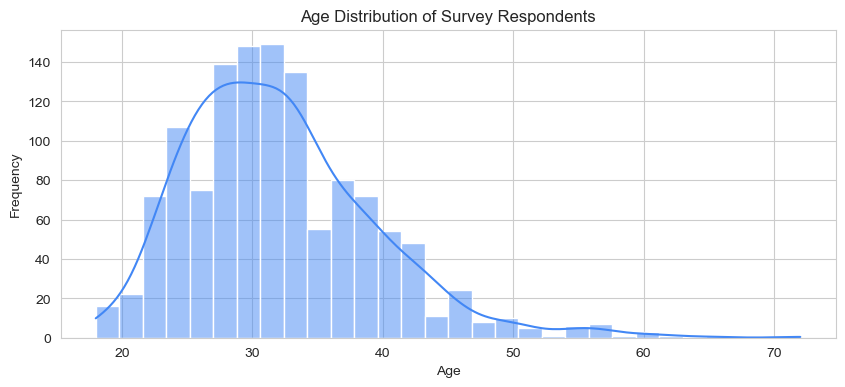

In [14]:
# Age distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'], bins=30, kde=True, color='#4287f5')
plt.title('Age Distribution of Survey Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

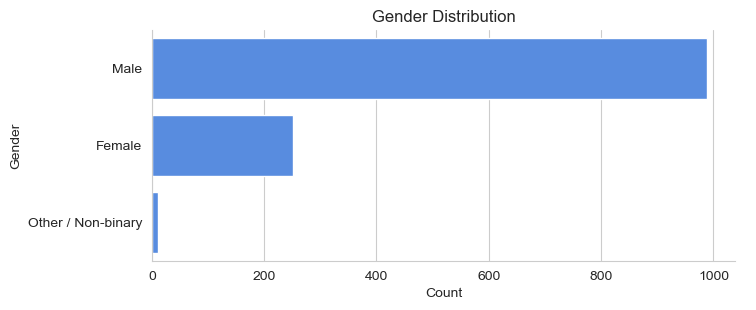

In [15]:
# Gender distribution
sns.catplot(y='Gender_clean', data=df, kind='count',
            order=df['Gender_clean'].value_counts().index,
            color='#4287f5', height=3, aspect=2.5)
plt.title('Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

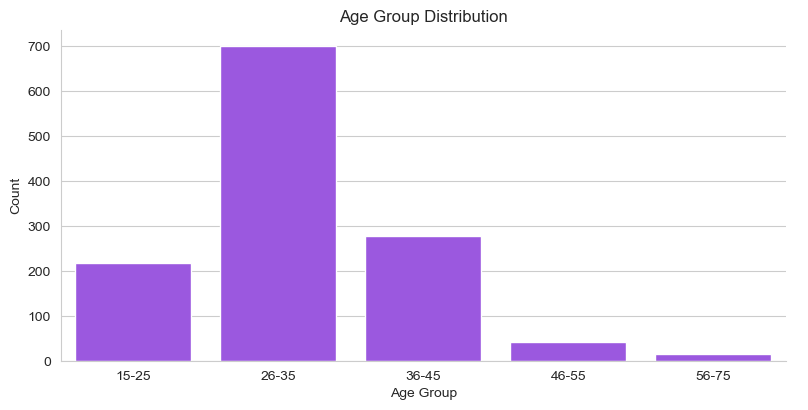

In [16]:
# Age group distribution
sns.catplot(x='age_group', data=df, kind='count',
            order=labels, color='#9b42f5', height=4, aspect=2)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

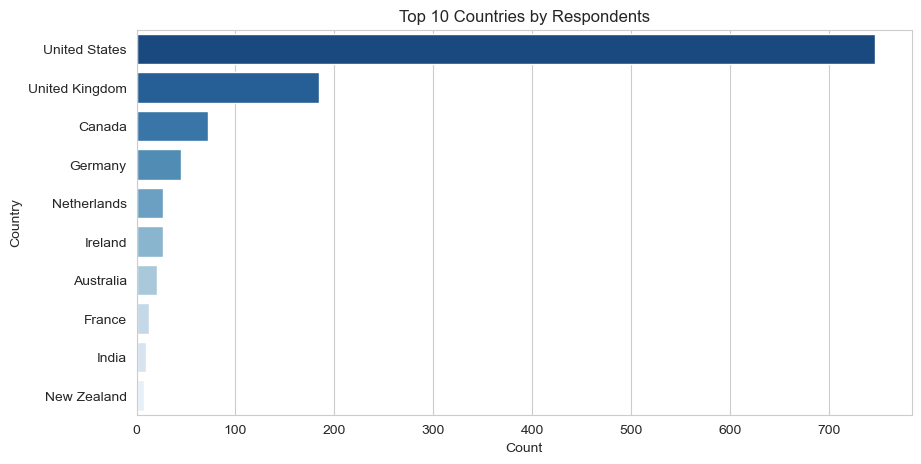

In [17]:
# Top 10 countries
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Blues_r')
plt.title('Top 10 Countries by Respondents')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

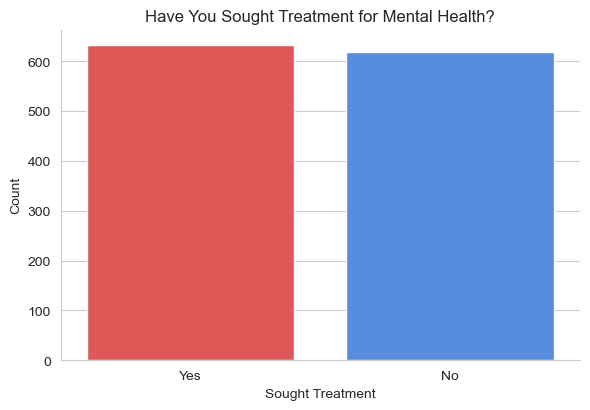

In [18]:
# Treatment distribution
sns.catplot(x='treatment', data=df, kind='count',
            palette=['#f54242', '#4287f5'], height=4, aspect=1.5)
plt.title('Have You Sought Treatment for Mental Health?')
plt.xlabel('Sought Treatment')
plt.ylabel('Count')
plt.show()

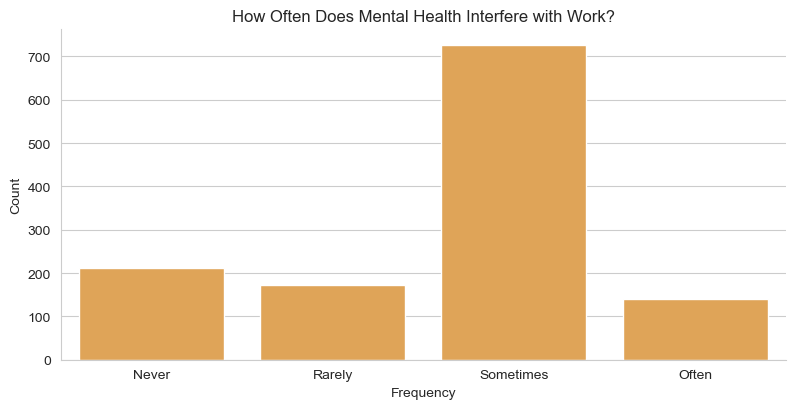

In [19]:
# Work interference
order_wi = ['Never', 'Rarely', 'Sometimes', 'Often']
sns.catplot(x='work_interfere', data=df, kind='count',
            order=order_wi, color='#f5a742', height=4, aspect=2)
plt.title('How Often Does Mental Health Interfere with Work?')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

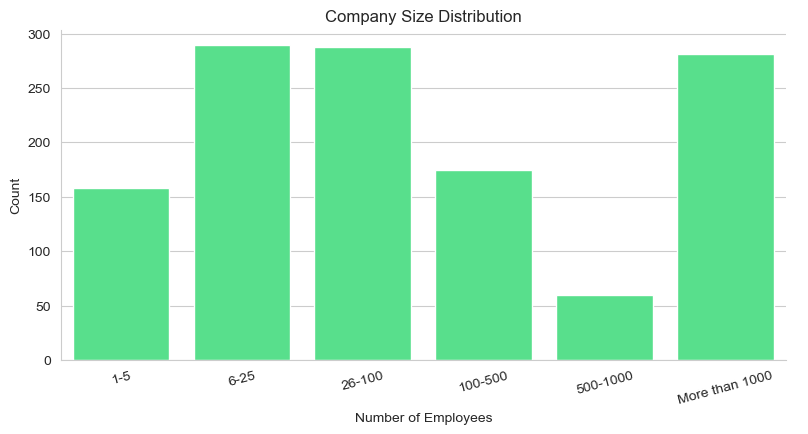

In [20]:
# Company size
size_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
sns.catplot(x='no_employees', data=df, kind='count',
            order=size_order, color='#42f587', height=4, aspect=2)
plt.title('Company Size Distribution')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

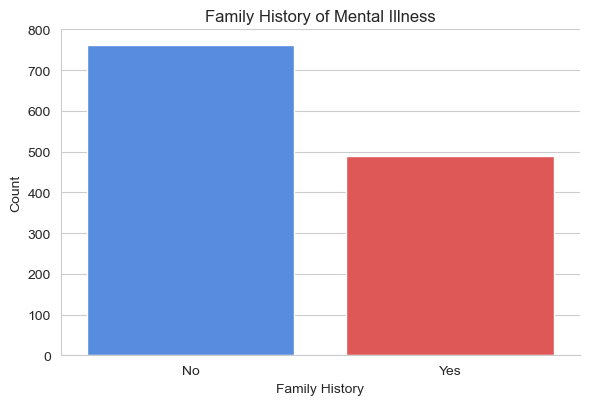

In [21]:
# Family history of mental illness
sns.catplot(x='family_history', data=df, kind='count',
            palette=['#4287f5', '#f54242'], height=4, aspect=1.5)
plt.title('Family History of Mental Illness')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

### WORKPLACE SUPPORT ANAYLYSIS 

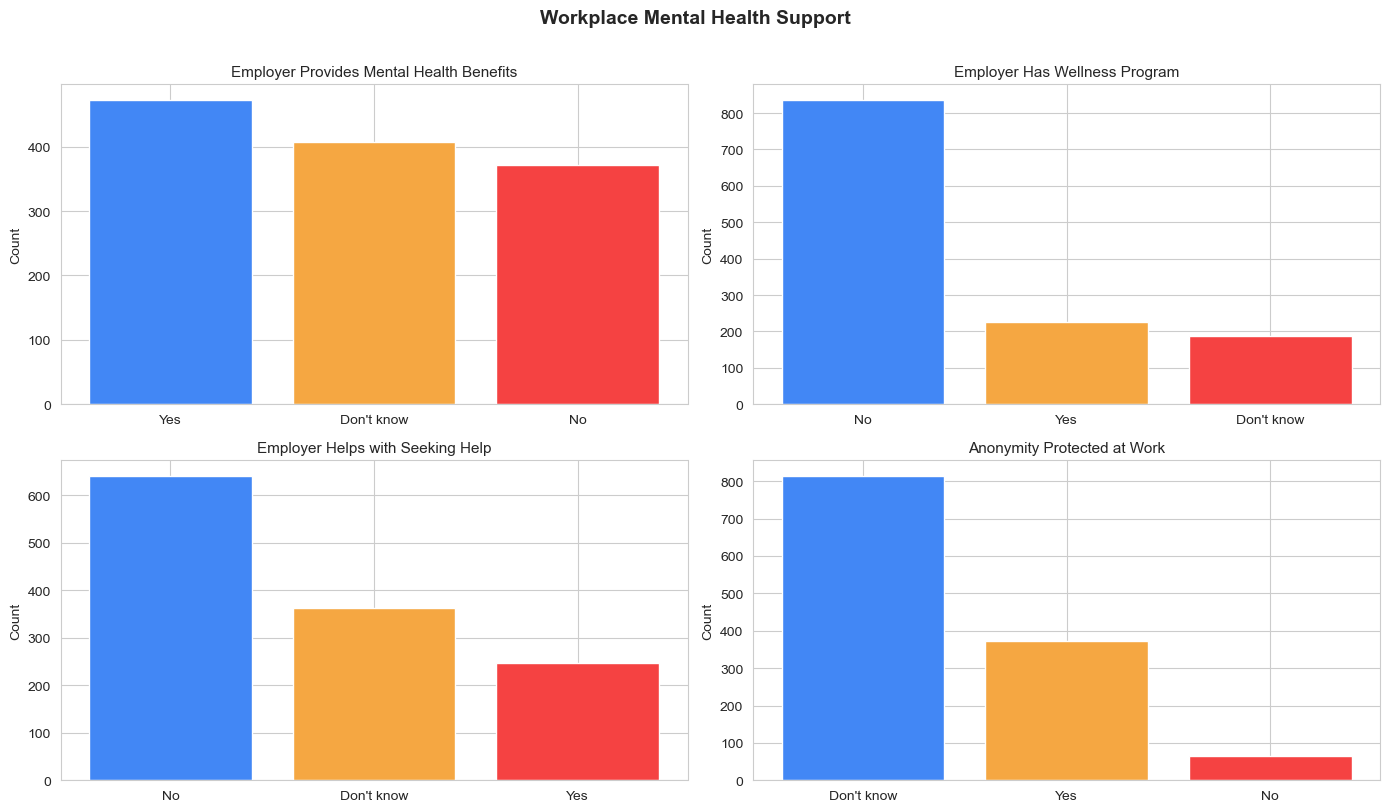

In [22]:
# Employer benefits, wellness, seek_help, anonymity — side by side
support_cols = ['benefits', 'wellness_program', 'seek_help', 'anonymity']
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

titles = [
    'Employer Provides Mental Health Benefits',
    'Employer Has Wellness Program',
    'Employer Helps with Seeking Help',
    'Anonymity Protected at Work'
]

for i, (col, title) in enumerate(zip(support_cols, titles)):
    counts = df[col].value_counts()
    axes[i].bar(counts.index, counts.values, color=['#4287f5', '#f5a742', '#f54242'][:len(counts)])
    axes[i].set_title(title, fontsize=11)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.suptitle('Workplace Mental Health Support', fontsize=14, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

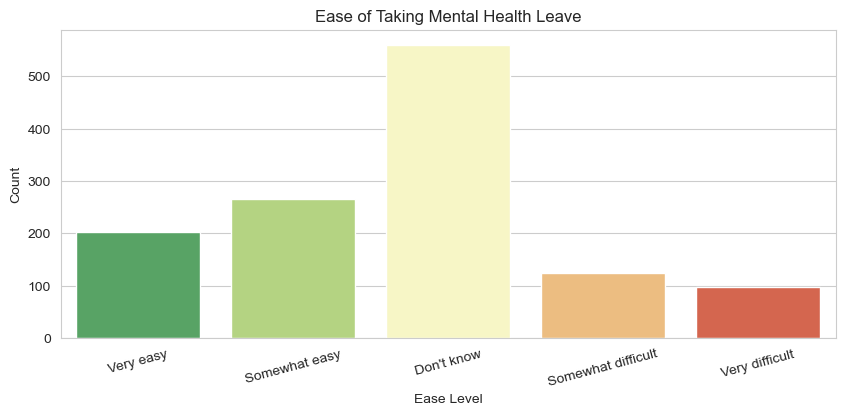

In [23]:
# Leave policy ease
leave_order = ["Very easy", "Somewhat easy", "Don't know", "Somewhat difficult", "Very difficult"]
leave_counts = df['leave'].value_counts().reindex(leave_order).dropna()
plt.figure(figsize=(10, 4))
sns.barplot(x=leave_counts.index, y=leave_counts.values, palette='RdYlGn_r')
plt.title('Ease of Taking Mental Health Leave')
plt.xlabel('Ease Level')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()

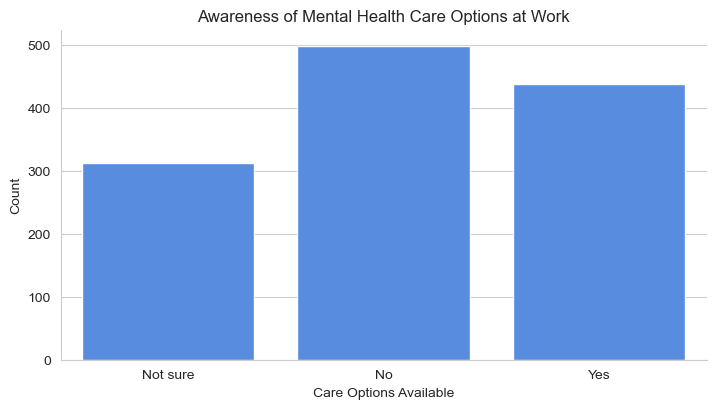

In [24]:
# Care options
sns.catplot(x='care_options', data=df, kind='count', color='#4287f5', height=4, aspect=1.8)
plt.title('Awareness of Mental Health Care Options at Work')
plt.xlabel('Care Options Available')
plt.ylabel('Count')
plt.show()

### TREATMENT-SEEKING ANAYLYSIS 

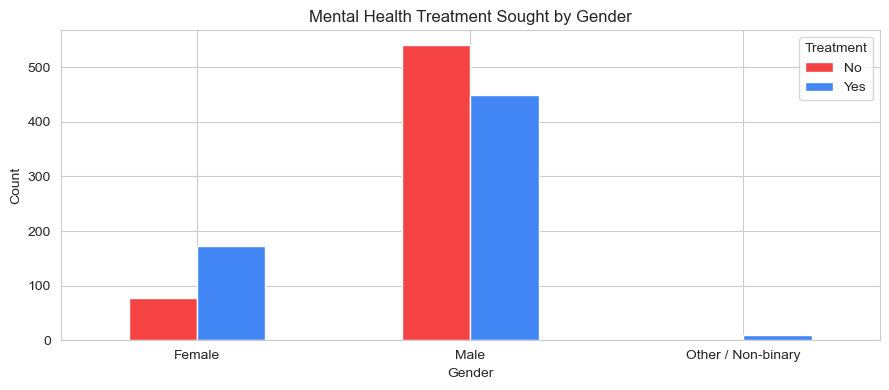

In [25]:
# Treatment by Gender
plt.figure(figsize=(9, 4))
crosstab1 = pd.crosstab(df['Gender_clean'], df['treatment'])
crosstab1.plot(kind='bar', color=['#f54242', '#4287f5'], edgecolor='white', ax=plt.gca())
plt.title('Mental Health Treatment Sought by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()

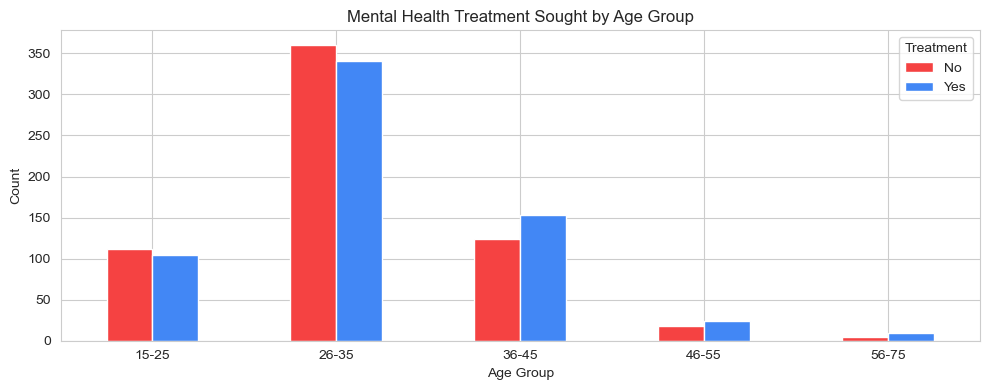

In [26]:
# Treatment by Age Group
plt.figure(figsize=(10, 4))
crosstab2 = pd.crosstab(df['age_group'], df['treatment'])
crosstab2.plot(kind='bar', color=['#f54242', '#4287f5'], edgecolor='white', ax=plt.gca())
plt.title('Mental Health Treatment Sought by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()

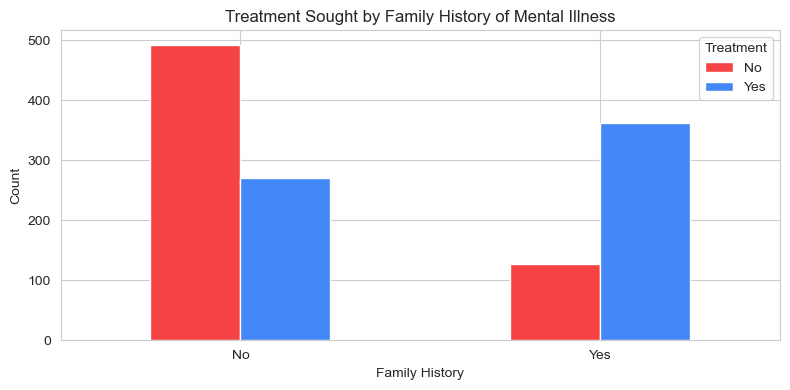

In [27]:
# Treatment by Family History
plt.figure(figsize=(8, 4))
ct = pd.crosstab(df['family_history'], df['treatment'])
ct.plot(kind='bar', color=['#f54242', '#4287f5'], edgecolor='white', ax=plt.gca())
plt.title('Treatment Sought by Family History of Mental Illness')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()

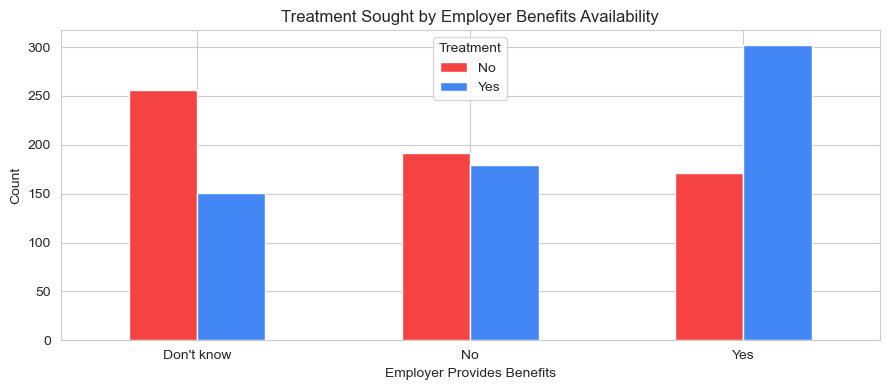

In [28]:
# Treatment rate by benefits availability
plt.figure(figsize=(9, 4))
ct2 = pd.crosstab(df['benefits'], df['treatment'])
ct2.plot(kind='bar', color=['#f54242', '#4287f5'], edgecolor='white', ax=plt.gca())
plt.title('Treatment Sought by Employer Benefits Availability')
plt.xlabel('Employer Provides Benefits')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()

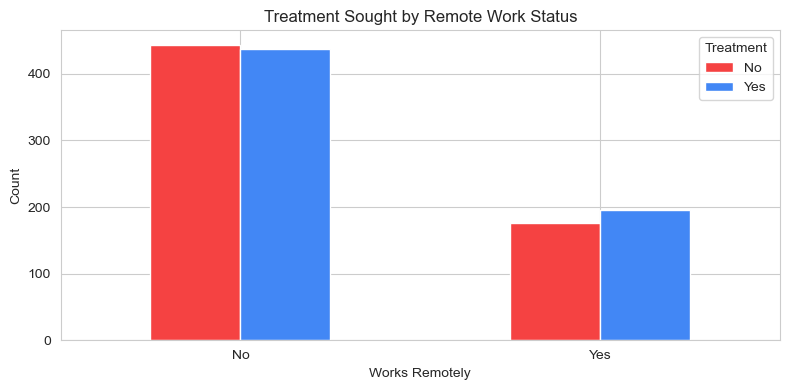

In [29]:
# Treatment by remote work
plt.figure(figsize=(8, 4))
ct3 = pd.crosstab(df['remote_work'], df['treatment'])
ct3.plot(kind='bar', color=['#f54242', '#4287f5'], edgecolor='white', ax=plt.gca())
plt.title('Treatment Sought by Remote Work Status')
plt.xlabel('Works Remotely')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()

### WORK INTERFERENCE ANALYSIS 

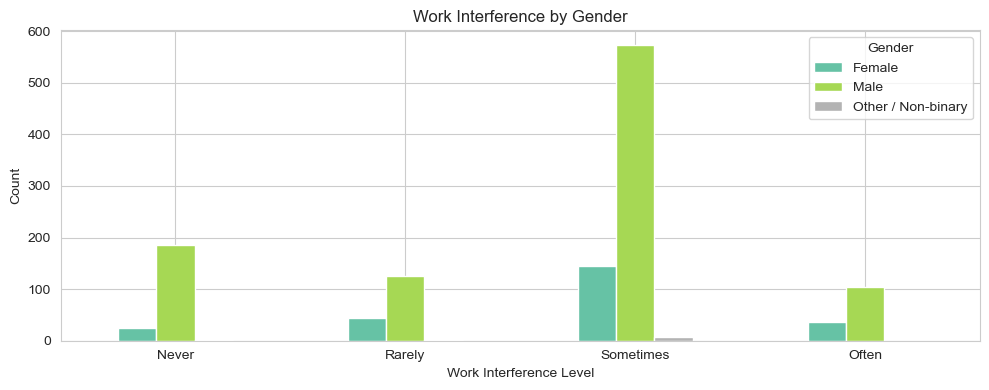

In [30]:
# Work interference by gender
plt.figure(figsize=(10, 4))
ct4 = pd.crosstab(df['work_interfere'], df['Gender_clean']).reindex(order_wi)
ct4.plot(kind='bar', colormap='Set2', edgecolor='white', ax=plt.gca())
plt.title('Work Interference by Gender')
plt.xlabel('Work Interference Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

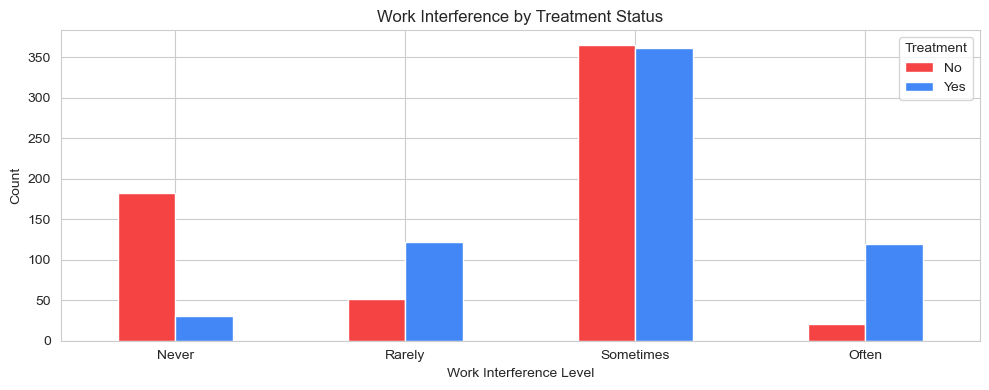

In [31]:
# Work interference by treatment
plt.figure(figsize=(10, 4))
ct5 = pd.crosstab(df['work_interfere'], df['treatment']).reindex(order_wi)
ct5.plot(kind='bar', color=['#f54242', '#4287f5'], edgecolor='white', ax=plt.gca())
plt.title('Work Interference by Treatment Status')
plt.xlabel('Work Interference Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Treatment')
plt.tight_layout()
plt.show()

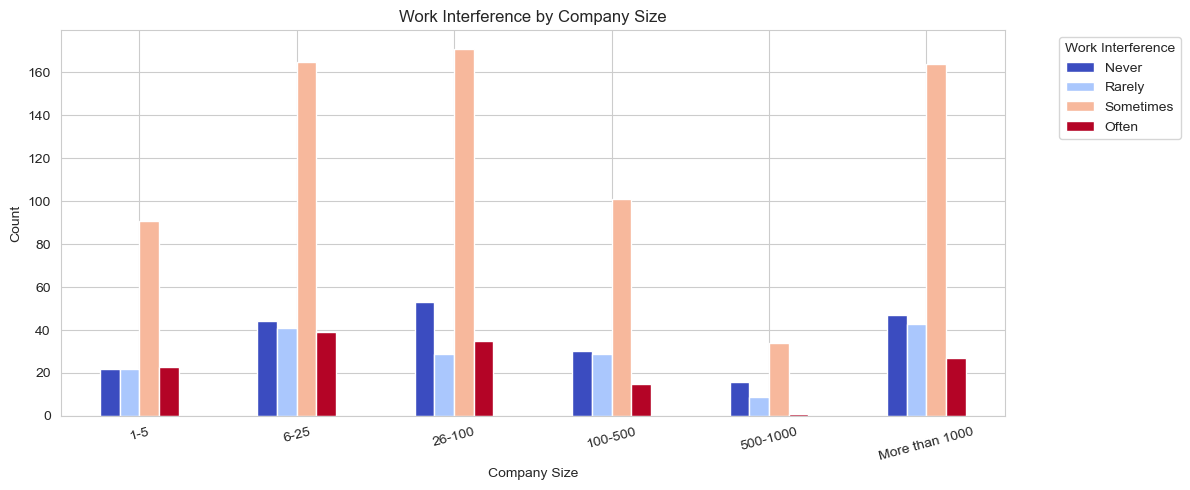

In [32]:
# Work interference by company size
plt.figure(figsize=(12, 5))
ct6 = pd.crosstab(df['no_employees'], df['work_interfere']).reindex(size_order)
ct6 = ct6[order_wi]
ct6.plot(kind='bar', colormap='coolwarm', edgecolor='white', ax=plt.gca())
plt.title('Work Interference by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.legend(title='Work Interference', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

### ATTITUDE TOWARD DISCUSSING MENTAL HEALTH 

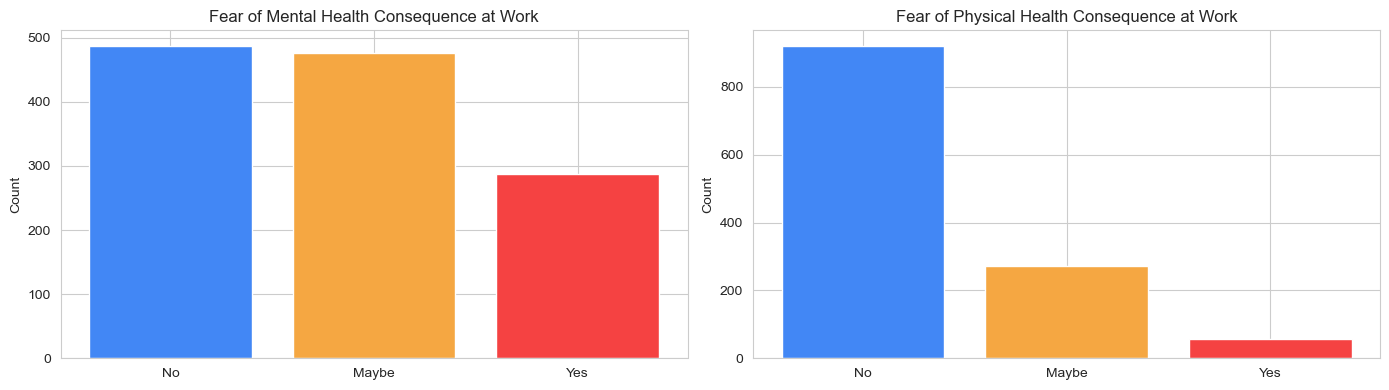

In [33]:
# Mental health consequence at work
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

mhc = df['mental_health_consequence'].value_counts()
axes[0].bar(mhc.index, mhc.values, color=['#4287f5', '#f5a742', '#f54242'])
axes[0].set_title('Fear of Mental Health Consequence at Work')
axes[0].set_ylabel('Count')

phc = df['phys_health_consequence'].value_counts()
axes[1].bar(phc.index, phc.values, color=['#4287f5', '#f5a742', '#f54242'])
axes[1].set_title('Fear of Physical Health Consequence at Work')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

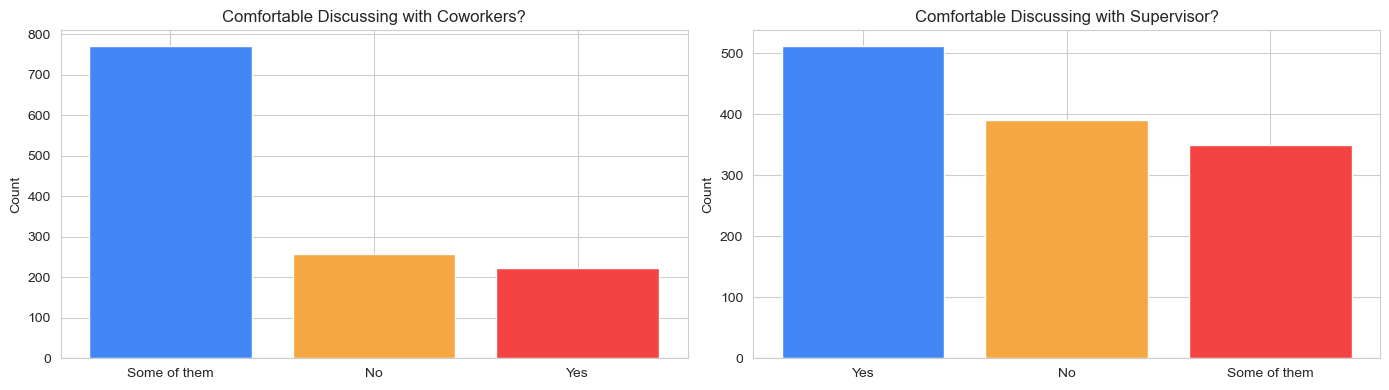

In [34]:
# Comfort discussing with coworkers vs supervisor
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

cow = df['coworkers'].value_counts()
axes[0].bar(cow.index, cow.values, color=['#4287f5', '#f5a742', '#f54242'])
axes[0].set_title('Comfortable Discussing with Coworkers?')
axes[0].set_ylabel('Count')

sup = df['supervisor'].value_counts()
axes[1].bar(sup.index, sup.values, color=['#4287f5', '#f5a742', '#f54242'])
axes[1].set_title('Comfortable Discussing with Supervisor?')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

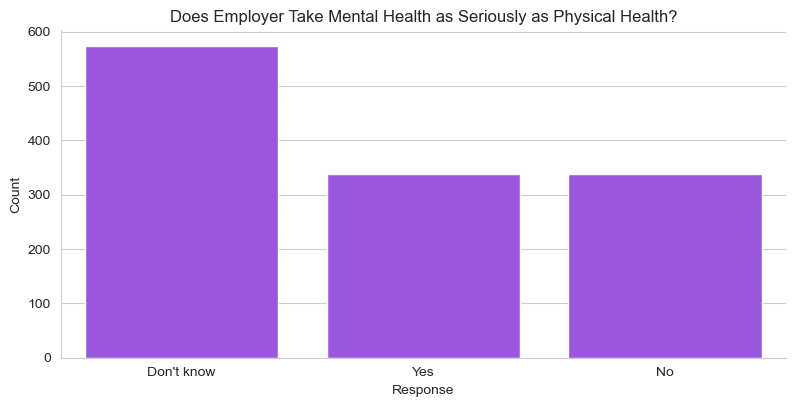

In [35]:
# Mental health vs physical health priority
sns.catplot(x='mental_vs_physical', data=df, kind='count',
            order=df['mental_vs_physical'].value_counts().index,
            color='#9b42f5', height=4, aspect=2)
plt.title('Does Employer Take Mental Health as Seriously as Physical Health?')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

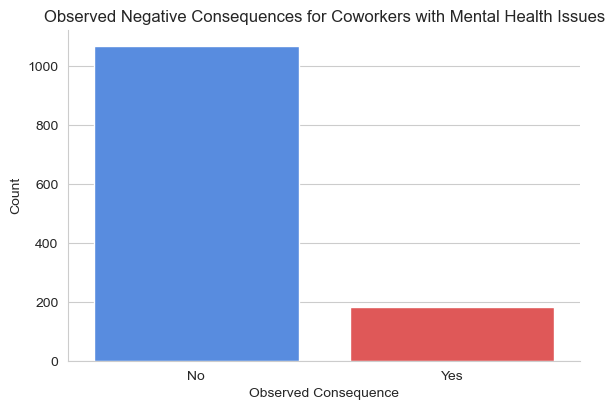

In [36]:
# Observed consequences for coworkers
sns.catplot(x='obs_consequence', data=df, kind='count',
            palette=['#4287f5', '#f54242'], height=4, aspect=1.5)
plt.title('Observed Negative Consequences for Coworkers with Mental Health Issues')
plt.xlabel('Observed Consequence')
plt.ylabel('Count')
plt.show()

### HEATMAP-CORRELATION OF KEY FACTORS 

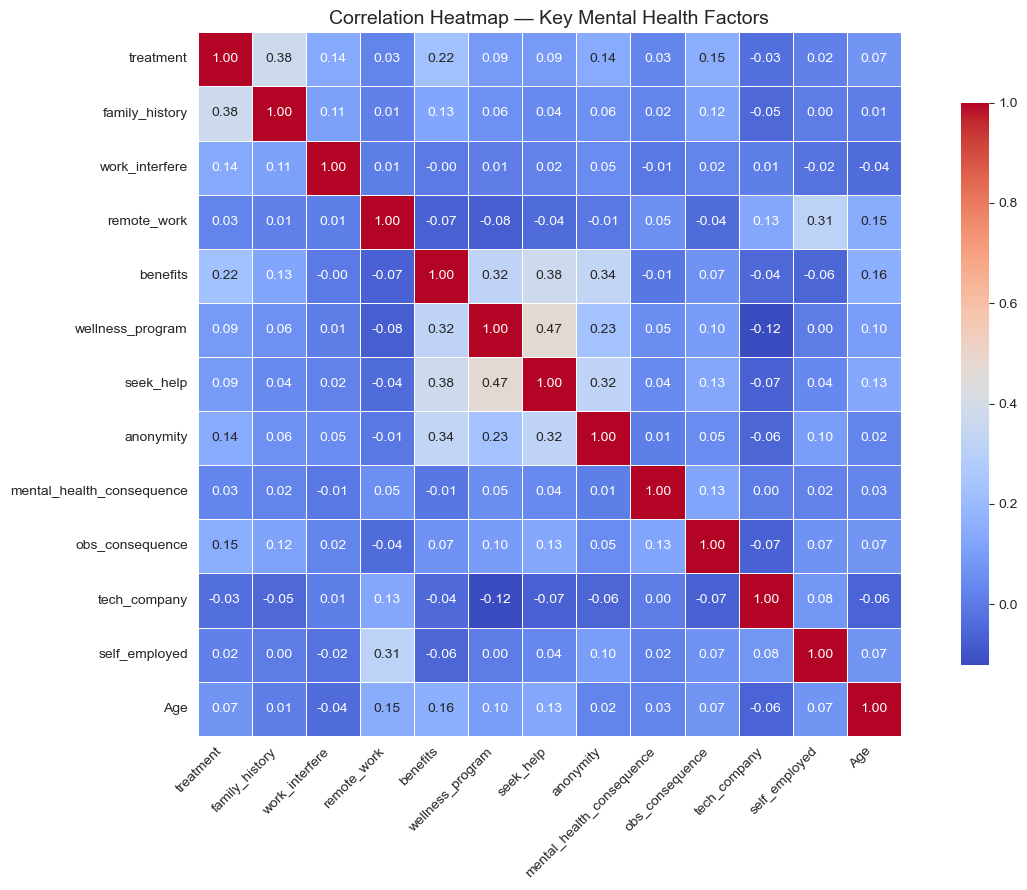

In [37]:
# Encode key categorical columns for correlation
encode_cols = [
    'treatment', 'family_history', 'work_interfere', 'remote_work',
    'benefits', 'wellness_program', 'seek_help', 'anonymity',
    'mental_health_consequence', 'obs_consequence', 'tech_company', 'self_employed'
]

# Simple label encode
from sklearn.preprocessing import LabelEncoder
df_enc = df[encode_cols + ['Age']].copy()
le = LabelEncoder()
for col in encode_cols:
    df_enc[col] = le.fit_transform(df_enc[col].astype(str))

corr = df_enc.corr()

plt.figure(figsize=(13, 9))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.4, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap — Key Mental Health Factors', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### COUNTRY-LEVEL ANALYSIS 

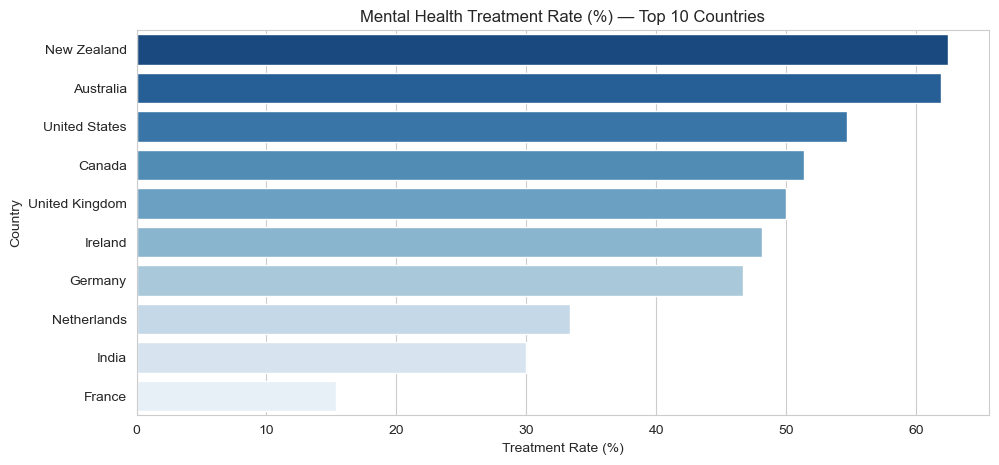

In [38]:
# Treatment rate by top 10 countries
top10 = df['Country'].value_counts().head(10).index.tolist()
df_top10 = df[df['Country'].isin(top10)]

treatment_rate = df_top10.groupby('Country')['treatment'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).sort_values(ascending=False)

plt.figure(figsize=(11, 5))
sns.barplot(x=treatment_rate.values, y=treatment_rate.index, palette='Blues_r')
plt.title('Mental Health Treatment Rate (%) — Top 10 Countries')
plt.xlabel('Treatment Rate (%)')
plt.ylabel('Country')
plt.show()

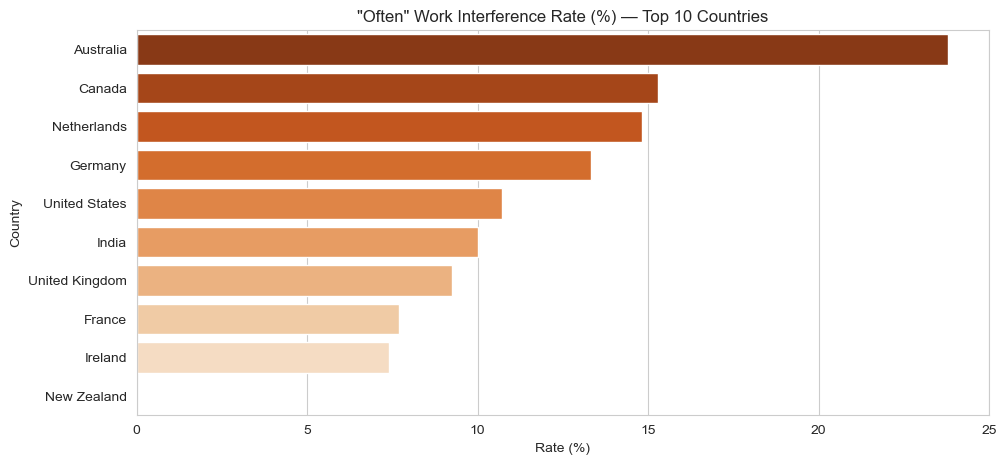

In [39]:
# Work interference rate (Often) by top 10 countries
often_rate = df_top10.groupby('Country')['work_interfere'].apply(
    lambda x: (x == 'Often').sum() / len(x) * 100
).sort_values(ascending=False)

plt.figure(figsize=(11, 5))
sns.barplot(x=often_rate.values, y=often_rate.index, palette='Oranges_r')
plt.title('"Often" Work Interference Rate (%) — Top 10 Countries')
plt.xlabel('Rate (%)')
plt.ylabel('Country')
plt.show()

### OUTLIER DETECTION-AGE

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(y=df['Age'], ax=axes[0], color='#4287f5')
axes[0].set_title('Age — Boxplot (After Cleaning)')

sns.histplot(df['Age'], bins=25, kde=True, ax=axes[1], color='#4287f5')
axes[1].set_title('Age — Distribution (After Cleaning)')

plt.tight_layout()
plt.show()

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Age'] < Q1 - 1.5*IQR) | (df['Age'] > Q3 + 1.5*IQR)]
print(f'Age outliers remaining: {len(outliers)}')